In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#to ignore warning
import warnings
warnings.filterwarnings("ignore")


# Loading Data

In [2]:
df = pd.read_csv('Copy of sonar data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


# Splitting input and output(label data)

In [3]:
df.shape

(207, 61)

In [4]:
X = df.drop(['60'],axis =1 )
Y =df['60']

In [5]:
print(X.shape)
print(Y.shape)

(207, 60)
(207,)


# Train_test splitting

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.3)

In [7]:
print(f'Training data shape:X_train: {X_train.shape},Y_train: {y_train.shape}')
print(f'Test data shape:X_test: {X_test.shape},Y_test: {y_test.shape}')
print(f'sonar shape:X_shape: {X.shape},Y_shape: {Y.shape}')

Training data shape:X_train: (144, 60),Y_train: (144,)
Test data shape:X_test: (63, 60),Y_test: (63,)
sonar shape:X_shape: (207, 60),Y_shape: (207,)


# Training and testing the model

In [8]:
#import logistic  regression for binary classification of the data
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model_prediction = model.predict(X_test)

### creating visualization of the predicted data

In [11]:
#imort maplotlib 
import matplotlib.pyplot as plt


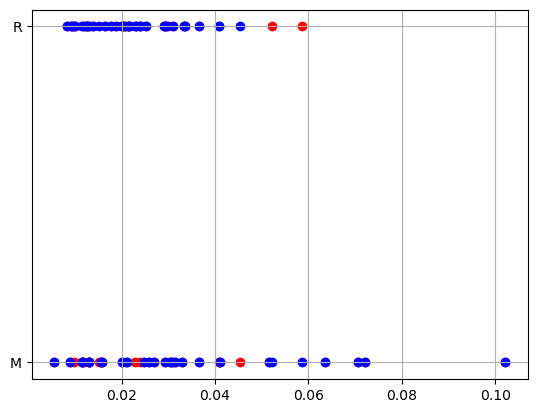

In [12]:
plt.scatter(X_test['0'],model_prediction,color ='r')
plt.scatter(X_test['0'],y_test,color ='b')
plt.grid()
plt.show()

## Accuracy score calculation and evaluation

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_of_training_sets = accuracy_score(model.predict(X_train),y_train)
print(accuracy_of_training_sets)

0.8472222222222222


In [15]:
#calculating the accuracy score of the test data
predicted_data = model.predict(X_test)
accuracy_of_test_sets = accuracy_score(predicted_data, y_test)
print(accuracy_of_test_sets)

0.7777777777777778


## testing the new example

Original shape of the new test data (60,)
Shape of reshaped data to the  new test data (1, 60)
['R']


## developing the predictive system

In [17]:
x_new = (0.0286,0.0453,0.0277,0.0174,0.0384,0.099,0.1201,0.1833,0.2105,0.3039,0.2988,0.425,0.6343,0.8198,1,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.589,0.2872,0.2043,0.5782,0.5389,0.375,0.3411,0.5067,0.558,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.265,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062)
new_data_array = np.asarray(x_new)
print(f'Original shape of the new test data {new_data_array.shape}')
shaped_data = new_data_array.reshape(1,-1)
print(f'Shape of reshaped data to the  new test data {shaped_data.shape}')
prediction = model.predict(shaped_data)
if prediction[0]=='R':
    print(f'The object is Rock')
else:
    print(f'The object is Mine')

Original shape of the new test data (60,)
Shape of reshaped data to the  new test data (1, 60)
The object is Rock
